In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from numpy.core.arrayprint import printoptions
import matplotlib.pyplot as plt
import numpy as np
import array as arr
# Python program to read
# json file
import re

import json
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from datetime import datetime
# Opening JSON file
f = open('/content/drive/MyDrive/Phân tích nghiệp vụ thông minh/data/transformed_data.json')

# returns JSON object as
# a dictionary
data = json.load(f)
macBooks = []
for x in data:
  if x['Product'] == 'Macbook Pro Laptop':
    macbook ={'ngay': x['Datekey'], 'soluong': x['QuantityOrdered'], 'gia': x['Revenue']/ x['QuantityOrdered']}
    macBooks.append(macbook)
# print(macBooks)
#doi lai ngay
x = macBooks.pop(1)
macBooks.append(x)
slMac=[]
days = []
for macBook in macBooks:
  slMac.append(macBook['soluong'])
  day = datetime.strptime(macBook['ngay'], '%m/%d/%y')
  days.append(macBook['ngay'])



In [ ]:
days

In [ ]:
macBooks

[{'ngay': '01/01/19', 'soluong': 9, 'gia': 1700.0},
 {'ngay': '01/02/19', 'soluong': 9, 'gia': 1700.0},
 {'ngay': '01/03/19', 'soluong': 4, 'gia': 1700.0},
 {'ngay': '01/04/19', 'soluong': 10, 'gia': 1700.0},
 {'ngay': '01/05/19', 'soluong': 4, 'gia': 1700.0},
 {'ngay': '01/06/19', 'soluong': 5, 'gia': 1700.0},
 {'ngay': '01/07/19', 'soluong': 6, 'gia': 1700.0},
 {'ngay': '01/08/19', 'soluong': 11, 'gia': 1700.0},
 {'ngay': '01/09/19', 'soluong': 7, 'gia': 1700.0},
 {'ngay': '01/10/19', 'soluong': 3, 'gia': 1700.0},
 {'ngay': '01/11/19', 'soluong': 15, 'gia': 1700.0},
 {'ngay': '01/12/19', 'soluong': 2, 'gia': 1700.0},
 {'ngay': '01/13/19', 'soluong': 10, 'gia': 1700.0},
 {'ngay': '01/14/19', 'soluong': 8, 'gia': 1700.0},
 {'ngay': '01/15/19', 'soluong': 9, 'gia': 1700.0},
 {'ngay': '01/16/19', 'soluong': 5, 'gia': 1700.0},
 {'ngay': '01/17/19', 'soluong': 6, 'gia': 1700.0},
 {'ngay': '01/18/19', 'soluong': 4, 'gia': 1700.0},
 {'ngay': '01/19/19', 'soluong': 7, 'gia': 1700.0},
 {'ngay'

In [ ]:
len(macBooks)

366

In [ ]:
min(slMac)

1

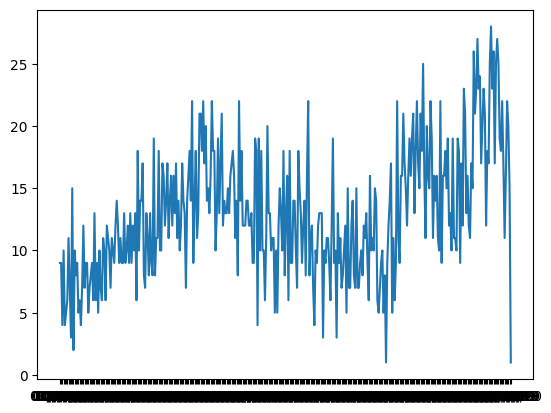

In [ ]:
import matplotlib.pyplot as plt
plt.plot(days, slMac)
plt.show()

DUNG 3 NGAY DE DU DOAN

Voi 3 ngay lien truoc de du doan
Do chinh xac:  0.41631354699189704
mse:  4.094497767328623
------------


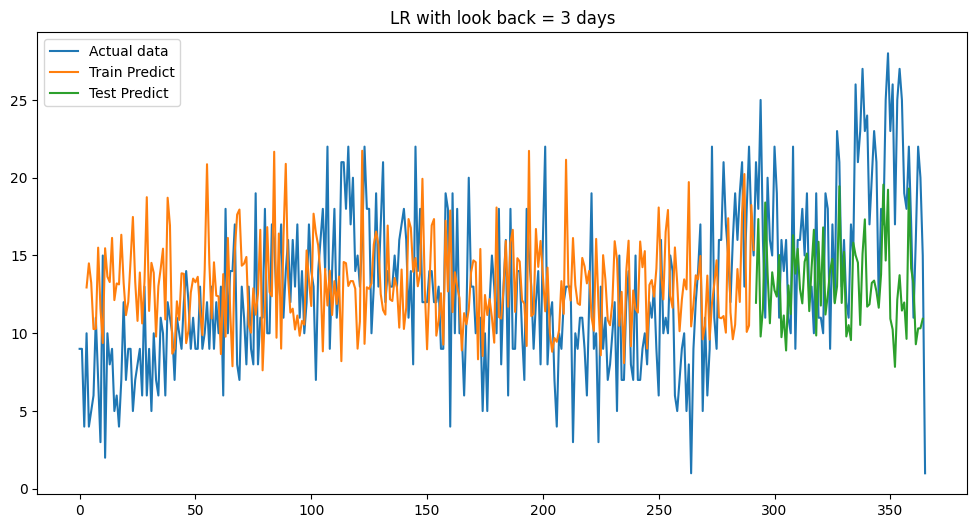

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import array as arr
# Python program to read
# json file
import re, math

import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
X=[]
for i in range(len(macBooks)-3-1):
  x = slMac[i:i+3]
  X.append(x)
Y = slMac[3:len(macBooks)-1]
# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2)
#du doan voi 3 ngay lien


# the test set will be 20% of the whole data set
# instantiate, fit
regr = LinearRegression()
regr.fit(x_train, y_train)
mse = mean_squared_error(y_test, regr.predict(x_test))
# print(linreg.score(x_test, y_test))
count=0
loss_func = 0
loss_func_3var=[]
y_pred = regr.predict(x_test)

for i in range(len(y_test)):
  if(abs(y_pred[i]-y_test[i]) < (y_test[i]*0.1)):
    count +=1
  loss_func += (y_pred[i]-y_test[i])**2
loss_func_3var.append(loss_func)
print('Voi 3 ngay lien truoc de du doan')
print('Do chinh xac: ', regr.score(x_test, y_test))
print("mse: ",math.sqrt(mse))
print('------------')

y_train_pred = regr.predict(x_train)

# Vẽ biểu đồ kết quả dự đoán
plt.figure(figsize=(12, 6))
plt.plot(slMac, label='Actual data')
train_predict_plot = np.empty_like(slMac,dtype=float)
train_predict_plot[:] = np.nan
train_predict_plot[3:len(y_train_pred)+3] = y_train_pred
test_predict_plot = np.empty_like(slMac,dtype=float)
test_predict_plot[:] = np.nan
test_predict_plot[len(y_train_pred) + 3:len(slMac)-1] =  y_pred
plt.plot(train_predict_plot, label='Train Predict')
plt.plot(test_predict_plot, label='Test Predict')
plt.title(f'LR with look back = {3} days')
plt.legend()
plt.show()
# print(len(y_train_pred) + 3-len(slMac))
# print(len(y_pred))

In [ ]:
X

[[9, 9, 4],
 [9, 4, 10],
 [4, 10, 4],
 [10, 4, 5],
 [4, 5, 6],
 [5, 6, 11],
 [6, 11, 7],
 [11, 7, 3],
 [7, 3, 15],
 [3, 15, 2],
 [15, 2, 10],
 [2, 10, 8],
 [10, 8, 9],
 [8, 9, 5],
 [9, 5, 6],
 [5, 6, 4],
 [6, 4, 7],
 [4, 7, 12],
 [7, 12, 7],
 [12, 7, 9],
 [7, 9, 9],
 [9, 9, 5],
 [9, 5, 7],
 [5, 7, 8],
 [7, 8, 9],
 [8, 9, 6],
 [9, 6, 13],
 [6, 13, 6],
 [13, 6, 9],
 [6, 9, 5],
 [9, 5, 10],
 [5, 10, 7],
 [10, 7, 6],
 [7, 6, 11],
 [6, 11, 10],
 [11, 10, 6],
 [10, 6, 12],
 [6, 12, 11],
 [12, 11, 10],
 [11, 10, 7],
 [10, 7, 11],
 [7, 11, 10],
 [11, 10, 9],
 [10, 9, 12],
 [9, 12, 14],
 [12, 14, 12],
 [14, 12, 9],
 [12, 9, 11],
 [9, 11, 9],
 [11, 9, 9],
 [9, 9, 13],
 [9, 13, 9],
 [13, 9, 10],
 [9, 10, 12],
 [10, 12, 9],
 [12, 9, 13],
 [9, 13, 9],
 [13, 9, 12],
 [9, 12, 10],
 [12, 10, 13],
 [10, 13, 6],
 [13, 6, 18],
 [6, 18, 10],
 [18, 10, 14],
 [10, 14, 14],
 [14, 14, 17],
 [14, 17, 8],
 [17, 8, 7],
 [8, 7, 13],
 [7, 13, 11],
 [13, 11, 8],
 [11, 8, 13],
 [8, 13, 9],
 [13, 9, 8],
 [9, 8, 19],


In [ ]:
Y

[10,
 4,
 5,
 6,
 11,
 7,
 3,
 15,
 2,
 10,
 8,
 9,
 5,
 6,
 4,
 7,
 12,
 7,
 9,
 9,
 5,
 7,
 8,
 9,
 6,
 13,
 6,
 9,
 5,
 10,
 7,
 6,
 11,
 10,
 6,
 12,
 11,
 10,
 7,
 11,
 10,
 9,
 12,
 14,
 12,
 9,
 11,
 9,
 9,
 13,
 9,
 10,
 12,
 9,
 13,
 9,
 12,
 10,
 13,
 6,
 18,
 10,
 14,
 14,
 17,
 8,
 7,
 13,
 11,
 8,
 13,
 9,
 8,
 19,
 8,
 11,
 11,
 18,
 10,
 10,
 17,
 16,
 12,
 14,
 17,
 11,
 14,
 16,
 12,
 16,
 13,
 17,
 11,
 14,
 10,
 12,
 17,
 14,
 13,
 7,
 14,
 16,
 18,
 14,
 22,
 9,
 14,
 18,
 11,
 13,
 21,
 21,
 18,
 22,
 17,
 20,
 14,
 15,
 13,
 16,
 22,
 18,
 18,
 10,
 13,
 19,
 13,
 17,
 21,
 12,
 14,
 13,
 13,
 15,
 13,
 16,
 17,
 18,
 16,
 11,
 14,
 8,
 22,
 14,
 18,
 12,
 12,
 12,
 14,
 14,
 12,
 12,
 13,
 9,
 9,
 19,
 18,
 4,
 19,
 10,
 18,
 10,
 10,
 6,
 11,
 20,
 13,
 13,
 10,
 11,
 11,
 5,
 10,
 5,
 12,
 15,
 13,
 10,
 18,
 8,
 13,
 16,
 6,
 18,
 9,
 9,
 14,
 14,
 10,
 7,
 18,
 15,
 13,
 9,
 12,
 14,
 8,
 16,
 22,
 8,
 11,
 12,
 7,
 4,
 10,
 9,
 12,
 13,
 13,
 13,
 3,
 10,
 9

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
quantity=np.array(slMac)
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
quantity = scaler.fit_transform(quantity.reshape(-1, 1))

In [ ]:
quantity

array([[0.2962963 ],
       [0.2962963 ],
       [0.11111111],
       [0.33333333],
       [0.11111111],
       [0.14814815],
       [0.18518519],
       [0.37037037],
       [0.22222222],
       [0.07407407],
       [0.51851852],
       [0.03703704],
       [0.33333333],
       [0.25925926],
       [0.2962963 ],
       [0.14814815],
       [0.18518519],
       [0.11111111],
       [0.22222222],
       [0.40740741],
       [0.22222222],
       [0.2962963 ],
       [0.2962963 ],
       [0.14814815],
       [0.22222222],
       [0.25925926],
       [0.2962963 ],
       [0.18518519],
       [0.44444444],
       [0.18518519],
       [0.2962963 ],
       [0.14814815],
       [0.33333333],
       [0.22222222],
       [0.18518519],
       [0.37037037],
       [0.33333333],
       [0.18518519],
       [0.40740741],
       [0.37037037],
       [0.33333333],
       [0.22222222],
       [0.37037037],
       [0.33333333],
       [0.2962963 ],
       [0.40740741],
       [0.48148148],
       [0.407

DUNG 7 NGAY DE DU DOAN

Voi 7 ngay lien truoc de du doan
Do chinh xac:  0.5080011708579883
mse:  3.428087928850744
------------


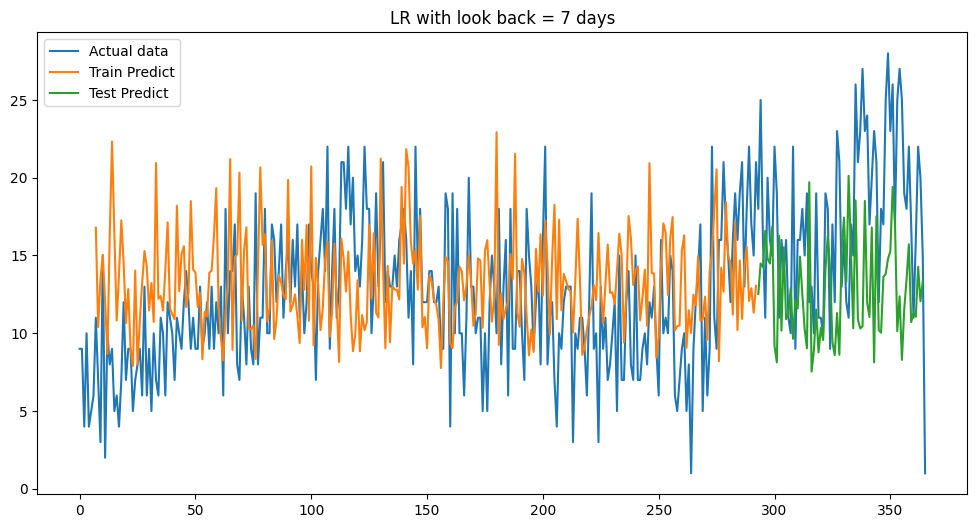

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import array as arr
# Python program to read
# json file
import re

import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
X=[]
for i in range(len(macBooks)-7-1):
  x = slMac[i:i+7]
  X.append(x)
Y = slMac[7:len(macBooks)-1]
# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2)
# the test set will be 20% of the whole data set
# instantiate, fit
regr = LinearRegression()
regr.fit(x_train, y_train)
mse = mean_squared_error(y_test, regr.predict(x_test))
# print(linreg.score(x_test, y_test))
count=0
loss_func = 0
y_pred = regr.predict(x_test)

for i in range(len(y_test)):
  if(abs(y_pred[i]-y_test[i]) < (y_test[i]*0.1)):
    count +=1
  loss_func += (y_pred[i]-y_test[i])**2
print('Voi 7 ngay lien truoc de du doan')
print('Do chinh xac: ', regr.score(x_test, y_test))
print("mse: ",math.sqrt(mse))
print('------------')

# Vẽ biểu đồ kết quả dự đoán
y_train_pred = regr.predict(x_train)
plt.figure(figsize=(12, 6))
plt.plot(slMac, label='Actual data')
train_predict_plot = np.empty_like(slMac,dtype=float)
train_predict_plot[:] = np.nan
train_predict_plot[7:len(y_train_pred)+7] = y_train_pred
test_predict_plot = np.empty_like(slMac,dtype=float)
test_predict_plot[:] = np.nan
test_predict_plot[len(y_train_pred) + 7:len(slMac)-1] =  y_pred
plt.plot(train_predict_plot, label='Train Predict')
plt.plot(test_predict_plot, label='Test Predict')
plt.title(f'LR with look back = {7} days')
plt.legend()
plt.show()

DUNG 10 NGAY DE DU DOAN

Voi 10 ngay lien truoc de du doan
Do chinh xac:  0.43829092734139485
mse:  3.997403637017601
------------


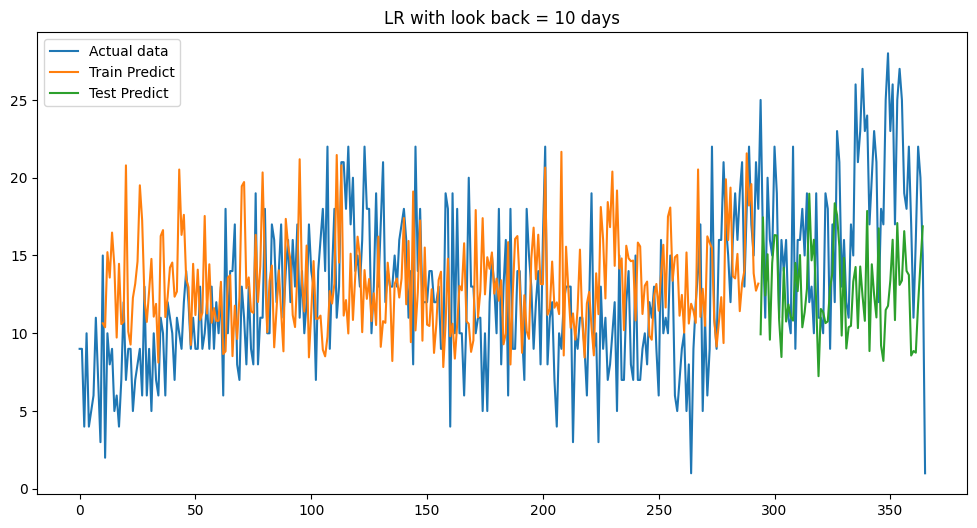

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import array as arr
# Python program to read
# json file
import re

import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
X=[]
for i in range(len(macBooks)-10-1):
  x = slMac[i:i+10]
  X.append(x)
Y = slMac[10:len(macBooks)-1]
# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2)
# the test set will be 20% of the whole data set
# instantiate, fit
regr = LinearRegression()
regr.fit(x_train, y_train)
mse = mean_squared_error(y_test, regr.predict(x_test))
# print(linreg.score(x_test, y_test))
count=0
loss_func = 0
loss_func_3var=[]
y_pred = regr.predict(x_test)

for i in range(len(y_test)):
  if(abs(y_pred[i]-y_test[i]) < (y_test[i]*0.1)):
    count +=1
  loss_func += (y_pred[i]-y_test[i])**2
loss_func_3var.append(loss_func)
print('Voi 10 ngay lien truoc de du doan')
print('Do chinh xac: ', regr.score(x_test, y_test))
print("mse: ",math.sqrt(mse))
print('------------')
# Vẽ biểu đồ kết quả dự đoán
y_train_pred = regr.predict(x_train)
plt.figure(figsize=(12, 6))
plt.plot(slMac, label='Actual data')
train_predict_plot = np.empty_like(slMac,dtype=float)
train_predict_plot[:] = np.nan
train_predict_plot[10:len(y_train_pred)+10] = y_train_pred
test_predict_plot = np.empty_like(slMac,dtype=float)
test_predict_plot[:] = np.nan
test_predict_plot[len(y_train_pred) + 10:len(slMac)-1] =  y_pred
plt.plot(train_predict_plot, label='Train Predict')
plt.plot(test_predict_plot, label='Test Predict')
plt.title(f'LR with look back = {10} days')
plt.legend()
plt.show()

DUNG 14 NGAY DE DU DOAN

Voi 14 ngay lien truoc de du doan
Do chinh xac:  0.4721518925107179
mse:  3.8466764371707116
------------


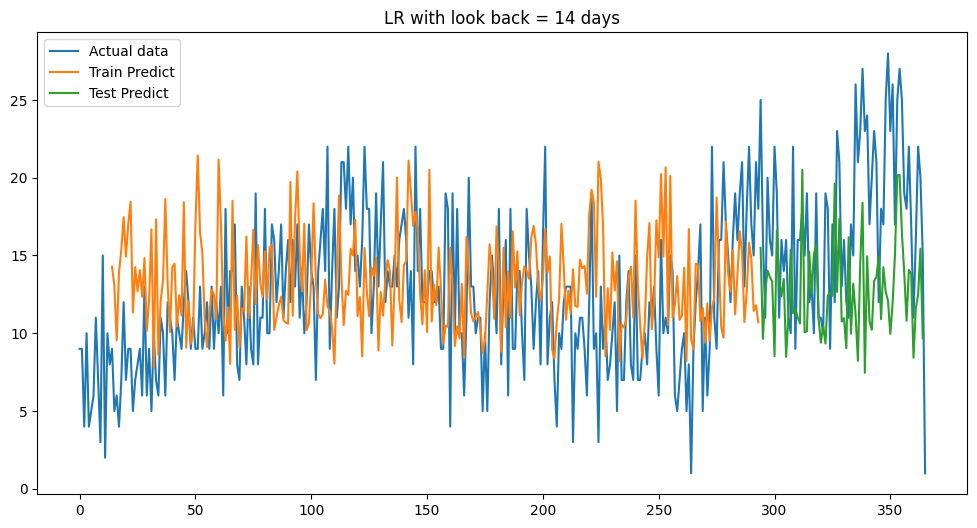

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import array as arr
# Python program to read
# json file
import re

import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
X=[]
for i in range(len(macBooks)-14-1):
  x = slMac[i:i+14]
  X.append(x)
Y = slMac[14:len(macBooks)-1]
# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2)

# the test set will be 20% of the whole data set
# instantiate, fit
regr = LinearRegression()
regr.fit(x_train, y_train)
mse = mean_squared_error(y_test, regr.predict(x_test))
# print(linreg.score(x_test, y_test))
count=0
loss_func = 0
loss_func_3var=[]
y_pred = regr.predict(x_test)

for i in range(len(y_test)):
  if(abs(y_pred[i]-y_test[i]) < (y_test[i]*0.1)):
    count +=1
  loss_func += (y_pred[i]-y_test[i])**2
loss_func_3var.append(loss_func)
print('Voi 14 ngay lien truoc de du doan')
print('Do chinh xac: ', regr.score(x_test, y_test))
print("mse: ",math.sqrt(mse))
print('------------')

# Vẽ biểu đồ kết quả dự đoán
y_train_pred = regr.predict(x_train)
plt.figure(figsize=(12, 6))
plt.plot(slMac, label='Actual data')
train_predict_plot = np.empty_like(slMac,dtype=float)
train_predict_plot[:] = np.nan
train_predict_plot[14:len(y_train_pred)+14] = y_train_pred
test_predict_plot = np.empty_like(slMac,dtype=float)
test_predict_plot[:] = np.nan
test_predict_plot[len(y_train_pred) + 14:len(slMac)-1] =  y_pred
plt.plot(train_predict_plot, label='Train Predict')
plt.plot(test_predict_plot, label='Test Predict')
plt.title(f'LR with look back = {14} days')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import array as arr
# Python program to read
# json file
import re

import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
X=[]
for i in range(len(macBooks)-15-1):
  x = slMac[i:i+15]
  X.append(x)
Y = slMac[15:len(macBooks)-1]
# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2)

# the test set will be 20% of the whole data set
# instantiate, fit
regr = LinearRegression()
regr.fit(x_train, y_train)
mse = mean_squared_error(y_test, regr.predict(x_test))
# print(linreg.score(x_test, y_test))
count=0
loss_func = 0
loss_func_3var=[]
y_pred = regr.predict(x_test)

for i in range(len(y_test)):
  if(abs(y_pred[i]-y_test[i]) < (y_test[i]*0.1)):
    count +=1
  loss_func += (y_pred[i]-y_test[i])**2
loss_func_3var.append(loss_func)
print('Voi ? ngay lien truoc de du doan')
print('Do chinh xac: ', regr.score(x_test, y_test))
print('------------')

Voi ? ngay lien truoc de du doan
Do chinh xac:  0.3282828373474722
------------


In [ ]:
mse

19.523664960198573

In [ ]:
np.sqrt(mse)

4.418559149790639

## LSTM

In [ ]:
!pip install numpy pandas tensorflow

Epoch 1/20
292/292 - 4s - loss: 0.0339 - 4s/epoch - 13ms/step
Epoch 2/20
292/292 - 1s - loss: 0.0248 - 1s/epoch - 4ms/step
Epoch 3/20
292/292 - 1s - loss: 0.0240 - 1s/epoch - 5ms/step
Epoch 4/20
292/292 - 2s - loss: 0.0238 - 2s/epoch - 5ms/step
Epoch 5/20
292/292 - 2s - loss: 0.0255 - 2s/epoch - 5ms/step
Epoch 6/20
292/292 - 1s - loss: 0.0235 - 1s/epoch - 4ms/step
Epoch 7/20
292/292 - 1s - loss: 0.0240 - 1s/epoch - 4ms/step
Epoch 8/20
292/292 - 1s - loss: 0.0245 - 1s/epoch - 4ms/step
Epoch 9/20
292/292 - 1s - loss: 0.0229 - 1s/epoch - 4ms/step
Epoch 10/20
292/292 - 1s - loss: 0.0240 - 1s/epoch - 4ms/step
Epoch 11/20
292/292 - 1s - loss: 0.0241 - 1s/epoch - 4ms/step
Epoch 12/20
292/292 - 1s - loss: 0.0244 - 1s/epoch - 4ms/step
Epoch 13/20
292/292 - 1s - loss: 0.0233 - 1s/epoch - 4ms/step
Epoch 14/20
292/292 - 1s - loss: 0.0247 - 1s/epoch - 4ms/step
Epoch 15/20
292/292 - 1s - loss: 0.0235 - 1s/epoch - 5ms/step
Epoch 16/20
292/292 - 1s - loss: 0.0240 - 1s/epoch - 5ms/step
Epoch 17/20
292/

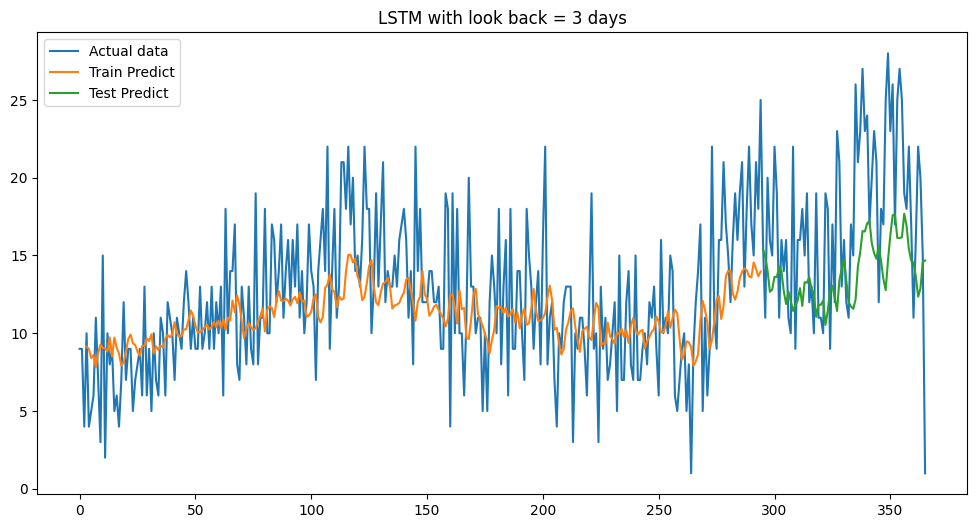

Epoch 1/20
292/292 - 5s - loss: 0.0315 - 5s/epoch - 17ms/step
Epoch 2/20
292/292 - 1s - loss: 0.0235 - 1s/epoch - 4ms/step
Epoch 3/20
292/292 - 1s - loss: 0.0224 - 1s/epoch - 4ms/step
Epoch 4/20
292/292 - 1s - loss: 0.0230 - 1s/epoch - 4ms/step
Epoch 5/20
292/292 - 1s - loss: 0.0226 - 1s/epoch - 4ms/step
Epoch 6/20
292/292 - 1s - loss: 0.0209 - 1s/epoch - 4ms/step
Epoch 7/20
292/292 - 1s - loss: 0.0227 - 1s/epoch - 4ms/step
Epoch 8/20
292/292 - 1s - loss: 0.0228 - 1s/epoch - 4ms/step
Epoch 9/20
292/292 - 1s - loss: 0.0225 - 1s/epoch - 4ms/step
Epoch 10/20
292/292 - 1s - loss: 0.0210 - 1s/epoch - 5ms/step
Epoch 11/20
292/292 - 2s - loss: 0.0219 - 2s/epoch - 5ms/step
Epoch 12/20
292/292 - 1s - loss: 0.0218 - 1s/epoch - 5ms/step
Epoch 13/20
292/292 - 1s - loss: 0.0213 - 1s/epoch - 4ms/step
Epoch 14/20
292/292 - 1s - loss: 0.0208 - 1s/epoch - 4ms/step
Epoch 15/20
292/292 - 1s - loss: 0.0221 - 1s/epoch - 4ms/step
Epoch 16/20
292/292 - 1s - loss: 0.0209 - 1s/epoch - 4ms/step
Epoch 17/20
292/

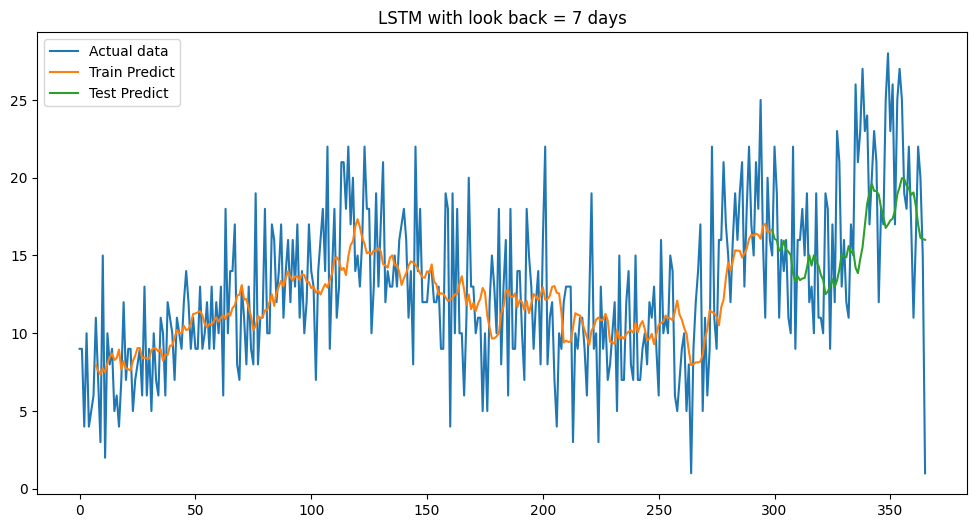

Epoch 1/20
292/292 - 5s - loss: 0.0305 - 5s/epoch - 17ms/step
Epoch 2/20
292/292 - 1s - loss: 0.0226 - 1s/epoch - 4ms/step
Epoch 3/20
292/292 - 1s - loss: 0.0246 - 1s/epoch - 4ms/step
Epoch 4/20
292/292 - 1s - loss: 0.0221 - 1s/epoch - 4ms/step
Epoch 5/20
292/292 - 1s - loss: 0.0217 - 1s/epoch - 4ms/step
Epoch 6/20
292/292 - 1s - loss: 0.0225 - 1s/epoch - 4ms/step
Epoch 7/20
292/292 - 2s - loss: 0.0226 - 2s/epoch - 6ms/step
Epoch 8/20
292/292 - 2s - loss: 0.0226 - 2s/epoch - 6ms/step
Epoch 9/20
292/292 - 1s - loss: 0.0212 - 1s/epoch - 5ms/step
Epoch 10/20
292/292 - 1s - loss: 0.0207 - 1s/epoch - 4ms/step
Epoch 11/20
292/292 - 1s - loss: 0.0213 - 1s/epoch - 5ms/step
Epoch 12/20
292/292 - 1s - loss: 0.0199 - 1s/epoch - 4ms/step
Epoch 13/20
292/292 - 1s - loss: 0.0208 - 1s/epoch - 4ms/step
Epoch 14/20
292/292 - 1s - loss: 0.0226 - 1s/epoch - 4ms/step
Epoch 15/20
292/292 - 1s - loss: 0.0210 - 1s/epoch - 4ms/step
Epoch 16/20
292/292 - 1s - loss: 0.0204 - 1s/epoch - 4ms/step
Epoch 17/20
292/

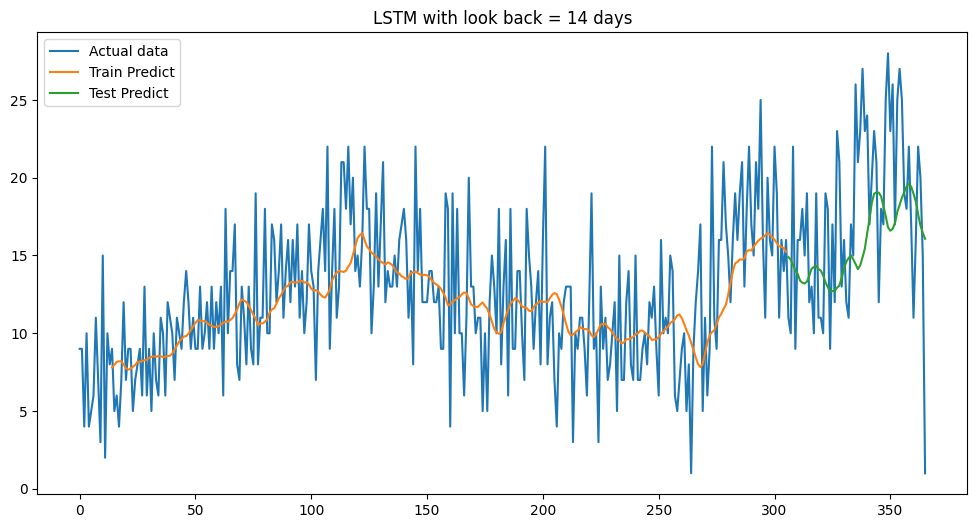

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# # Đọc dữ liệu từ tệp CSV
# data = pd.read_csv('data.csv')

# # Chuyển đổi cột date thành datetime (nếu cần)
# data['date'] = pd.to_datetime(data['date'])

# # Sắp xếp dữ liệu theo ngày
# data = data.sort_values('date')

# # Chỉ sử dụng cột quantity
# quantity = data['quantity'].values
quantity=np.array(slMac)
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
quantity = scaler.fit_transform(quantity.reshape(-1, 1))

# Hàm tạo dữ liệu theo sliding window
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

# Tạo dữ liệu cho 3, 7, và 14 ngày trước đó
look_backs = [3, 7, 14]
datasets = {}
for look_back in look_backs:
    X, y = create_dataset(quantity, look_back)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    datasets[look_back] = (X, y)

# Hàm tạo và huấn luyện mô hình LSTM
def train_lstm(X_train, y_train, X_test, y_test, look_back):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=2)

    train_predict = model.predict(X_train)
    # print(train_predict)
    test_predict = model.predict(X_test)

    # Đảo ngược chuẩn hóa dự đoán để tính RMSE
    train_predict = scaler.inverse_transform(train_predict)
    y_train = scaler.inverse_transform([y_train])
    test_predict = scaler.inverse_transform(test_predict)
    y_test = scaler.inverse_transform([y_test])

    train_score = np.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
    test_score = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))

    return model,train_predict, test_predict, train_score, test_score

# Chia dữ liệu thành tập huấn luyện và kiểm tra (80% huấn luyện, 20% kiểm tra)
train_size = int(len(quantity) * 0.8)
test_size = len(quantity) - train_size

# Huấn luyện và đánh giá mô hình cho 3, 5, và 15 ngày
for look_back in look_backs:
    X, y = datasets[look_back]
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    model,train_predict, test_predict, train_score, test_score = train_lstm(X_train, y_train, X_test, y_test, look_back)
    print(f'Look back: {look_back} days')
    print(f'Train RMSE: {train_score}')
    print(f'Test RMSE: {test_score}')
    print('-' * 30)

    # Vẽ biểu đồ kết quả dự đoán
    plt.figure(figsize=(12, 6))
    plt.plot(scaler.inverse_transform(quantity), label='Actual data')
    train_predict_plot = np.empty_like(quantity)
    train_predict_plot[:, :] = np.nan
    train_predict_plot[look_back:len(train_predict)+look_back, :] = train_predict
    test_predict_plot = np.empty_like(quantity)
    test_predict_plot[:, :] = np.nan
    test_predict_plot[len(train_predict) + (look_back):len(quantity), :] = test_predict
    plt.plot(train_predict_plot, label='Train Predict')
    plt.plot(test_predict_plot, label='Test Predict')
    plt.title(f'LSTM with look back = {look_back} days')
    plt.legend()
    plt.show()
